In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import preprocess
import pickle 
import keras
import csv
from IPython.display import display, HTML

Using TensorFlow backend.


In [33]:
# creating dictionary for labels
class_labels = {str(x):x for x in range(10)}
class_labels.update({'+':10, 'x':11, '-':12 })
label_class = dict( zip(class_labels.values(), class_labels.keys() ))

path1 = './Equation data/'
temp1 = np.load(path1+'Equations_images_1.npy')
temp2 = np.load(path1+'Equations_images_2.npy')
temp3 = np.load(path1+'Equations_images_3.npy')
temp4 = np.load(path1+'Equations_images_4.npy')
temp6 = np.load(path1+'Equations_images_6.npy')
temp8 = np.load(path1+'Equations_images_8.npy')
eqn_full = [temp1,temp2,temp3,temp4,temp6,temp8];

# Loading saved models for prediction
path = './trained models/'

names1 = ['Adaboost_stage1_ver1_500.1.sav','Adaboost_digits_ver1_1000.1.sav','Adaboost_chars_ver1_1000.1.sav',
         'RFmodel_ver1.1.sav','MLP_singlestage_ver1.1', 'cnn_Ian_v1']
names2 = ['Adaboost_stage1_ver2_500.1.sav','Adaboost_digits_ver2_1000.1.sav','Adaboost_chars_ver2_1000.1.sav',
         'RFmodel_ver2.1.sav','MLP_singlestage_ver2.1', 'cnn_Ian_v2']

adastage1_ver1,adadigits_ver1, adachars_ver1, rfmodel_ver1, MLP_single_ver1, cnn_ver1 = preprocess.load_models(path,0,names1)
adastage1_ver2,adadigits_ver2, adachars_ver2, rfmodel_ver2, MLP_single_ver2, cnn_ver2 = preprocess.load_models(path,0,names2)

equationpg1=["2 2 + 2 1 ","5 0 + 1 0 ","7 5 + 2 5 ","3 9 + 1 ","4 2 + 9 ","3 1 - 2 ","7 8 - 3 ","9 2 x 1 ","5 6 - 4 ","3 2 - 1 0 ","9 1 x 5 ","9 3 - 7 ","6 7 + 2 3 ","9 9 + 1 ","8 - 2 ","3 + 2 "];
equationpg2=["1 + 5 ","3 - 2 ","7 x 5 ","9 x 2 ","3 3 x 2 ","4 4 + 1 ","9 9 - 1 ","8 2 + 3 ","5 9 + 0 ","0 - 9 ","1 + 9 ","8 9 + 6 ","5 3 - 2 ","8 7 + 2 ","5 6 + 2 ","9 2 x 5 "];
equationpg3=["9 1 + 6 ","4 0 + 3 1 ","1 + 1 - 7 ","6 0 0 - 9 9 ","7 8 - 4 2 ","7 1 x 6 ","6 7 x 1 0 x 8 ","1 + 3 + 8 ","2 + 7 7 ","6 - 9 ","9 - 1 0 + 7 ","8 9 - 9 8 ","0 x 3 5 ","5 6 - 6 5 ","7 3 + 4 2 ","5 5 + 5 5 "];
equationpg4=["4 3 + 6 ","6 4 - 4 3 ","7 5 - 2 ", "7 7 x 5 3 ","7 1 - 7 ","2 1 + 0 ","2 + 6 4 ", "2 0 6 - 6 0 2 ","5 6 x 7 ","1 x 0 ","5 - 1 0 ","4 2 0 + 6 9 ","8 0 0 - 3 6 7 ","8 3 + 6 ","8 + 6 4 ","8 + 6 4 ", "7 1 + 8 8 "]  
equationpg6=["7 8 - 6 ", "7 3 - 4 ","7 x 8 0 - 4 1 ","5 5 + 6 9 ","4 2 + 0 ","9 9 x 3 ","1 1 x 5 + 0 ","8 7 + 2 0 ","9 - 3 ","4 0 2 - 8 ","3 3 + 7 6 ","1 9 x 6 - 3 8 ","4 0 0 + 2 0 ","8 3 x 6 2 ","6 4 - 7 8 ","2 4 x 3 0 4 "]
equationpg8=["2 9 x 3 9 ","7 5 - 5 7 ","9 9 + 9 9 ","1 4 0 x 0 ","5 2 5 - 7 2 ","1 5 7 5 + 2 1 4 9 ","2 x 2 ","7 + 7 ","1 2 3 4 x 5 6 ","4 7 4 x 1 2 ", "2 9 x 0 ", "1 3 - 3 ","1 0 0 + 1 0 ","1 2 7 - 8 0 ","7 8 1 + 1 7 ","4 1 0 9 x 9 2 "] 

num_equations = len(equationpg1)+len(equationpg2)+len(equationpg3)+len(equationpg4)+len(equationpg6)+len(equationpg8);
eqn_labels = [equationpg1,equationpg2,equationpg3,equationpg4,equationpg6,equationpg8];

performance_AB = {"type":"Adaboost classifier","ver1":0, "ver2":0, "ver1_digits":0, "ver1_symbols":0, "ver2_digits":0,"ver2_symbols":0};
performance_RF = {"type":"Random Forest classifier","ver1":0, "ver2":0, "ver1_digits":0, "ver1_symbols":0, "ver2_digits":0,"ver2_symbols":0};
performance_MLP = {"type":"MLP","ver1":0, "ver2":0, "ver1_digits":0, "ver1_symbols":0, "ver2_digits":0,"ver2_symbols":0};
performance_CNN = {"type":"CNN","ver1":0, "ver2":0, "ver1_digits":0, "ver1_symbols":0, "ver2_digits":0,"ver2_symbols":0};


Loaded models from disk
Loaded models from disk


In [4]:
def string_comparison(eqn_string,model_string):
    s1 = model_string[:-1].split(' ');
    s2 = eqn_string[:-1].split(' ');
    digit_counter =0;
    symbol_counter =0;
    for model,eqn in zip(s1,s2):
        if str.isnumeric(eqn):
            if(eqn==model):
                digit_counter = digit_counter +1;
        else:
            if(eqn==model):
                symbol_counter = symbol_counter +1;
    return digit_counter,symbol_counter

def dictionary_update(original_dict,eqn_string,model_ver1_string,model_ver2_string):
    dc=0;
    sc=0;
    dc,sc = string_comparison(eqn_string,model_ver1_string);
    original_dict["ver1"] =original_dict["ver1"] + (eqn_string==model_ver1_string)*1;
    original_dict["ver1_digits"] = original_dict["ver1_digits"] + dc;
    original_dict["ver1_symbols"] = original_dict["ver1_symbols"] + sc;
    dc=0;
    sc=0;
    dc,sc = string_comparison(eqn_string,model_ver2_string);
    original_dict["ver2"] =original_dict["ver2"] + (eqn_string==model_ver2_string)*1;
    original_dict["ver2_digits"] = original_dict["ver2_digits"] + dc;
    original_dict["ver2_symbols"] = original_dict["ver2_symbols"] + sc;
    return original_dict;

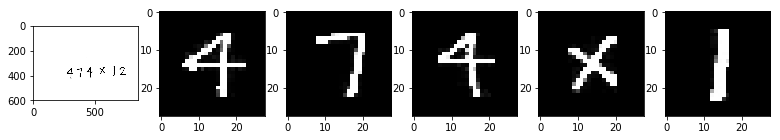

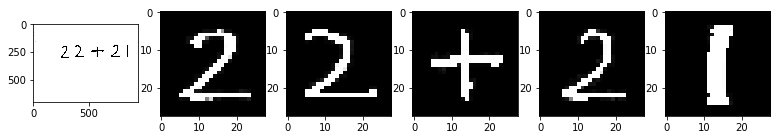

Equation =  2 2 + 2 1 


,RF,AB,MLP,CNN
ver1,2 x + 2 +,8 2 4 2 8,2 2 + 2 1,2 2 + 2 1
ver2,8 x + 2 +,8 2 9 2 1,2 2 + 2 1,2 2 + 2 1


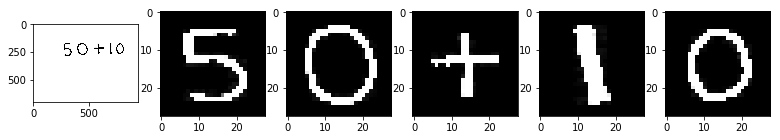

Equation =  5 0 + 1 0 


,RF,AB,MLP,CNN
ver1,3 0 + + 0,5 2 4 8 0,5 0 + 1 0,5 0 + 1 0
ver2,3 0 + + 0,3 5 4 8 0,5 0 + 1 0,5 0 + 1 0


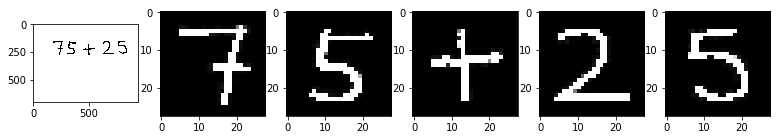

Equation =  7 5 + 2 5 


,RF,AB,MLP,CNN
ver1,- x + 2 3,3 5 4 8 3,3 5 + 2 5,7 5 + 2 5
ver2,3 5 + 2 3,3 5 4 2 3,7 5 + 2 5,3 5 + 2 5


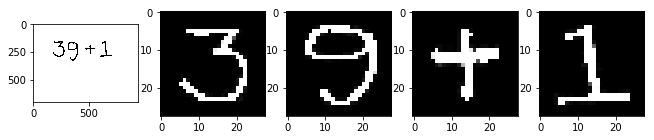

Equation =  3 9 + 1 


,RF,AB,MLP,CNN
ver1,0 0 + +,3 5 4 5,3 5 7 3,3 5 4 1
ver2,0 0 + 1,3 5 9 1,3 5 + 3,3 9 4 1


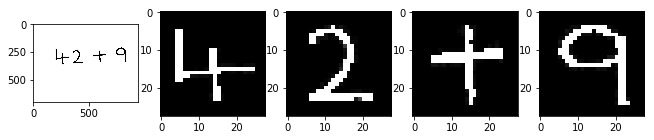

Equation =  4 2 + 9 


,RF,AB,MLP,CNN
ver1,+ 2 + -,7 2 9 4,7 2 7 9,6 2 + 9
ver2,+ 2 + -,4 2 9 4,4 2 + 4,6 2 + 9


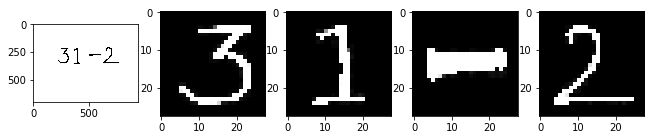

Equation =  3 1 - 2 


,RF,AB,MLP,CNN
ver1,0 + - x,0 3 4 3,3 1 7 3,3 1 5 2
ver2,0 + - 1,0 1 4 1,5 3 4 2,3 1 - 2


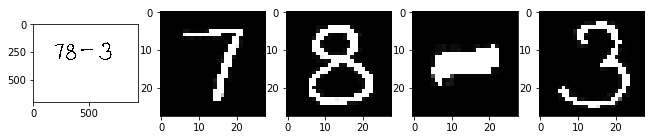

Equation =  7 8 - 3 


,RF,AB,MLP,CNN
ver1,3 x + -,9 5 x 2,7 8 4 3,7 8 2 3
ver2,7 x + 7,3 3 4 3,7 8 - 3,1 8 - 3


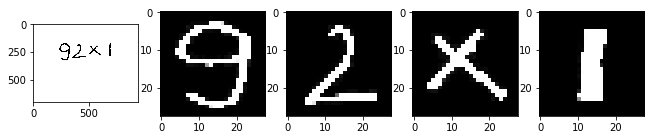

Equation =  9 2 x 1 


,RF,AB,MLP,CNN
ver1,+ 2 x +,5 8 5 8,5 2 x 1,5 2 x 1
ver2,- 1 x +,3 8 5 8,5 2 4 1,9 2 4 1


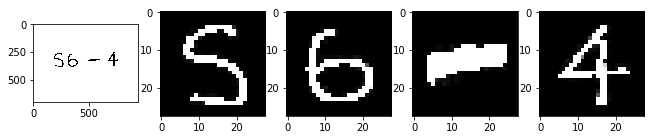

Equation =  5 6 - 4 


,RF,AB,MLP,CNN
ver1,x - + 4,5 5 4 4,5 5 7 4,5 6 5 4
ver2,- - + +,5 5 4 4,5 5 7 4,5 6 7 4


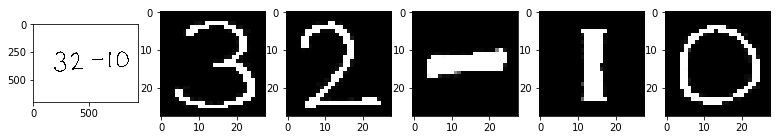

Equation =  3 2 - 1 0 


,RF,AB,MLP,CNN
ver1,- 2 - + 0,3 1 4 1 2,3 3 4 1 0,3 2 - 1 0
ver2,7 1 - + 0,3 1 4 1 5,3 2 - 1 0,3 2 - 1 0


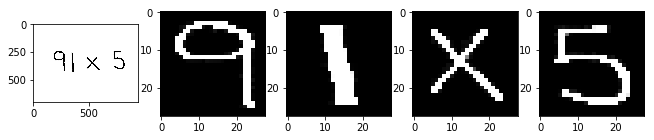

Equation =  9 1 x 5 


,RF,AB,MLP,CNN
ver1,0 + x 3,6 8 5 5,3 1 x 5,5 1 x 5
ver2,0 + x -,6 8 5 5,1 1 4 5,9 1 x 5


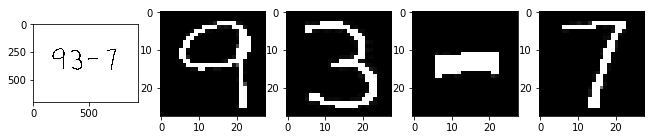

Equation =  9 3 - 7 


,RF,AB,MLP,CNN
ver1,- - - 7,6 3 x 2,4 3 + 1,9 3 5 7
ver2,- - - 7,6 3 - 1,4 3 - 3,9 3 - 1


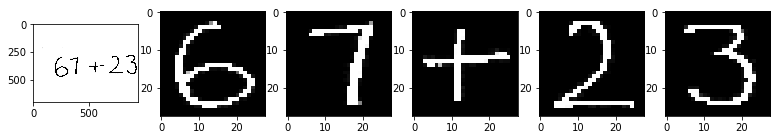

Equation =  6 7 + 2 3 


,RF,AB,MLP,CNN
ver1,- 7 + 2 0,5 0 5 2 3,2 7 8 2 3,6 7 + 2 3
ver2,- 7 + 2 0,5 3 8 1 3,5 7 7 2 3,6 1 + 2 3


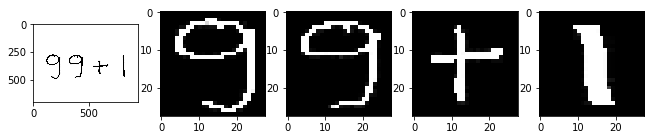

Equation =  9 9 + 1 


,RF,AB,MLP,CNN
ver1,7 0 + +,5 6 5 3,5 5 8 1,5 3 + 1
ver2,7 0 + +,5 5 8 1,5 5 + 1,x 5 + 1


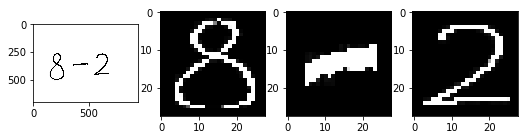

Equation =  8 - 2 


,RF,AB,MLP,CNN
ver1,- + 0,5 4 5,5 4 5,8 2 2
ver2,- - 0,5 4 5,3 - 2,x 2 2


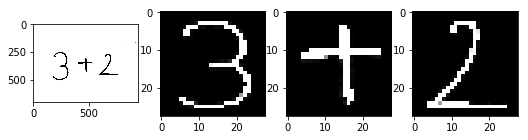

Equation =  3 + 2 


,RF,AB,MLP,CNN
ver1,- 7 1,3 9 1,3 7 3,3 5 1
ver2,- + x,3 9 1,3 7 3,3 7 1


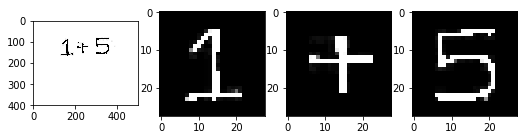

Equation =  1 + 5 


,RF,AB,MLP,CNN
ver1,1 + 3,8 9 5,1 + 5,1 + 5
ver2,1 + 0,1 + 5,1 + 5,1 + 5


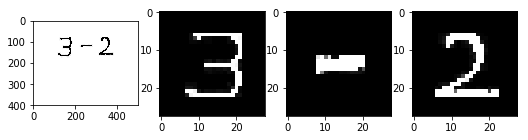

Equation =  3 - 2 


,RF,AB,MLP,CNN
ver1,- + 2,3 x 2,3 4 2,3 5 2
ver2,3 - 2,+ - 2,3 4 2,3 - 2


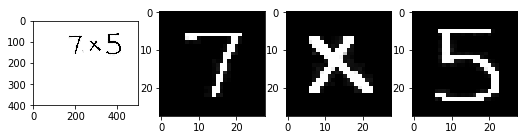

Equation =  7 x 5 


,RF,AB,MLP,CNN
ver1,7 x 3,7 5 5,7 x 5,7 x 5
ver2,7 x 3,7 5 5,7 x 5,7 x 5


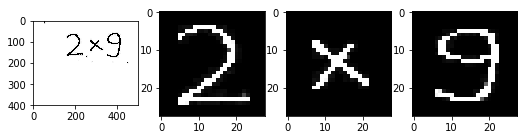

Equation =  9 x 2


,RF,AB,MLP,CNN
ver1,2 x 0,2 5 5,2 x 5,2 x 5
ver2,2 x 0,2 x 5,2 x 3,2 x 9


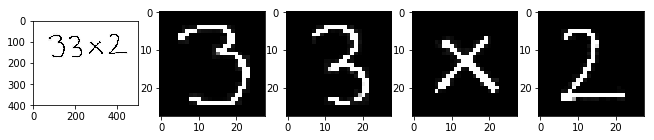

Equation =  3 3 x 2 


,RF,AB,MLP,CNN
ver1,0 x x +,2 3 x 5,3 3 x 2,3 3 x 2
ver2,0 3 x 1,3 3 x 5,3 3 x 2,3 3 x 2


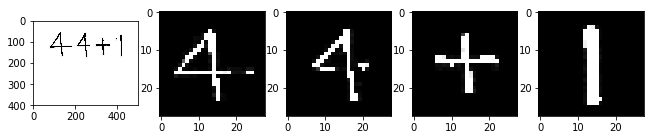

Equation =  4 4 + 1 


,RF,AB,MLP,CNN
ver1,+ 9 + +,7 9 4 1,1 4 + 1,+ 4 + 1
ver2,+ + + +,9 9 4 1,4 4 + 1,4 4 + 1


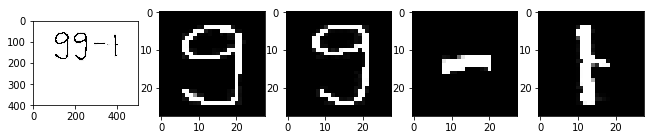

Equation =  9 9 - 1 


,RF,AB,MLP,CNN
ver1,0 0 - +,5 5 x 5,5 5 + 8,9 5 - 1
ver2,0 0 - x,5 5 - 8,3 5 - 8,9 5 - 1


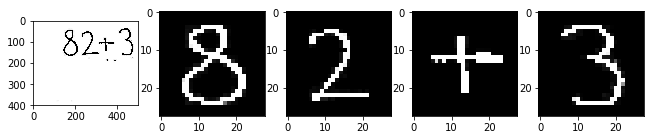

Equation =  8 2 + 3 


,RF,AB,MLP,CNN
ver1,3 1 + 3,5 2 x 3,8 2 + 3,8 2 + 3
ver2,3 1 + 7,3 2 9 3,8 2 + 3,8 2 + 3


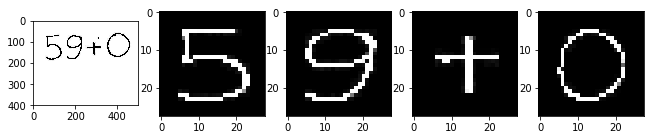

Equation =  5 9 + 0 


,RF,AB,MLP,CNN
ver1,3 - + 0,5 5 9 5,5 3 + 0,5 9 + 0
ver2,3 - + 0,5 5 9 5,5 9 + 0,5 9 + 0


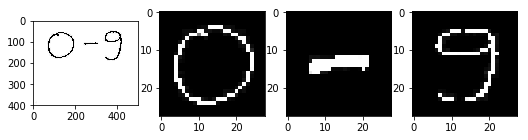

Equation =  0 - 9 


,RF,AB,MLP,CNN
ver1,0 - 0,5 x 5,0 + 7,0 - 5
ver2,0 - 0,5 - 5,0 - 5,0 - x


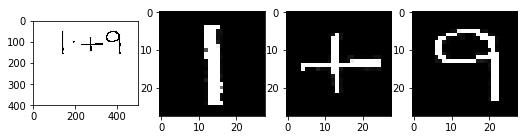

Equation =  1 + 9 


,RF,AB,MLP,CNN
ver1,+ + 0,1 4 9,1 + x,1 + 9
ver2,+ + -,1 4 9,1 4 4,1 + 9


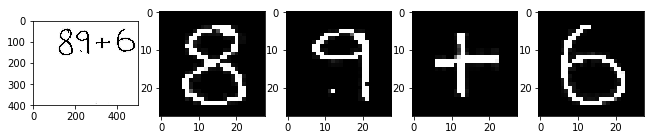

Equation =  8 9 + 6 


,RF,AB,MLP,CNN
ver1,x 0 + -,3 5 9 5,8 x + 5,8 9 + 6
ver2,x 0 + -,5 5 + 5,8 4 + 5,8 9 + 5


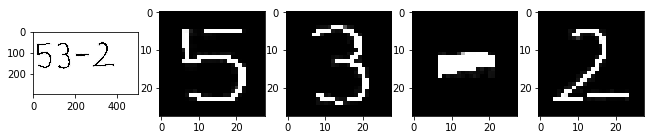

Equation =  5 3 - 2 


,RF,AB,MLP,CNN
ver1,3 3 + 2,5 3 x 2,5 3 4 2,5 3 5 2
ver2,3 3 - 2,5 3 - 2,5 3 - 2,5 3 - 2


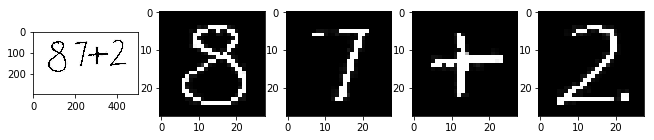

Equation =  8 7 + 2 


,RF,AB,MLP,CNN
ver1,3 7 + 2,3 7 4 2,8 1 + 2,8 7 + 2
ver2,3 7 + 2,3 9 4 2,8 7 + 2,8 1 + 2


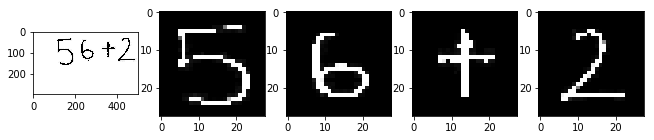

Equation =  5 6 + 2 


,RF,AB,MLP,CNN
ver1,- 0 + 2,5 2 9 2,5 6 + 1,5 6 + 2
ver2,0 0 + 1,5 5 4 2,5 6 + 2,5 6 + 2


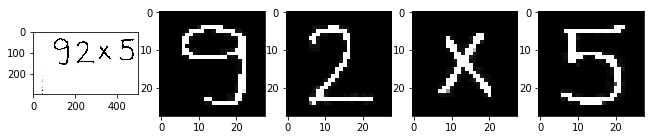

Equation =  9 2 x 5 


,RF,AB,MLP,CNN
ver1,0 1 x 3,5 8 + 5,5 2 x 5,5 2 x 5
ver2,0 1 x 0,5 2 x 5,5 2 x 5,9 2 x 5


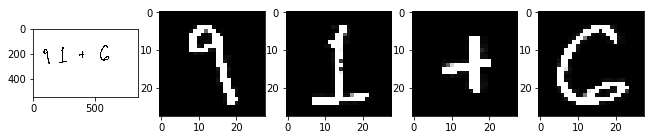

Equation =  9 1 + 6 


,RF,AB,MLP,CNN
ver1,7 1 + 0,9 5 4 5,3 1 4 5,9 1 7 0
ver2,7 1 + 0,3 1 + 5,3 1 + 5,9 1 4 0


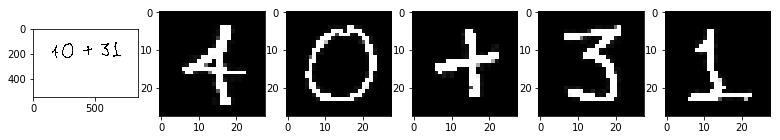

Equation =  4 0 + 3 1 


,RF,AB,MLP,CNN
ver1,+ 0 + 3 5,4 0 9 3 5,4 0 + 3 5,4 0 + 3 1
ver2,+ 0 + 3 5,4 5 9 3 5,4 0 + 3 5,4 0 4 3 1


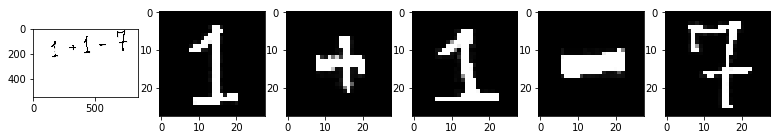

Equation =  1 +1 - 7 


,RF,AB,MLP,CNN
ver1,1 + + + 2,1 4 8 4 2,1 + 1 4 7,1 7 1 - 7
ver2,1 + + - 7,1 4 8 - 2,1 + 1 - 7,1 4 1 - +


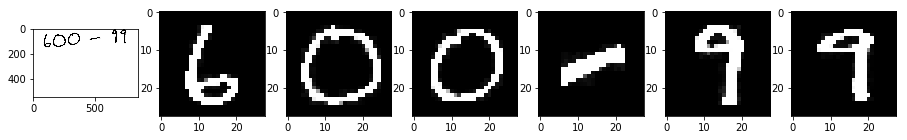

Equation =  6 0 0 - 9 9 


,RF,AB,MLP,CNN
ver1,0 0 0 x 7 7,5 2 5 4 9 9,6 0 0 x 7 7,6 0 0 5 9 7
ver2,0 0 0 - 7 7,5 5 5 - 9 9,5 0 0 - 7 +,6 0 0 2 9 7


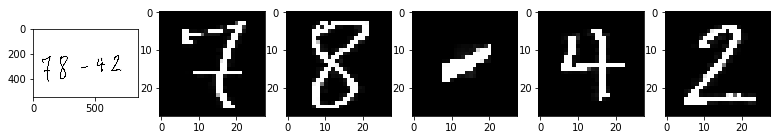

Equation =  7 8 - 4 2 


,RF,AB,MLP,CNN
ver1,2 x x - x,4 5 x 9 8,7 8 x 4 2,7 8 7 4 2
ver2,7 x x + x,4 5 4 9 1,7 3 - 4 2,7 8 1 4 2


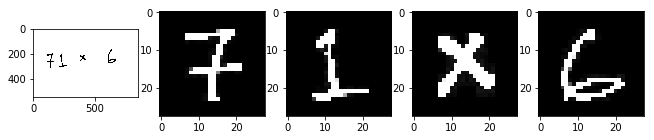

Equation =  7 1 x 6 


,RF,AB,MLP,CNN
ver1,+ x x 0,3 5 8 5,7 5 x 0,7 2 2 2
ver2,+ x x 0,3 5 x 5,7 5 x 6,7 2 2 2


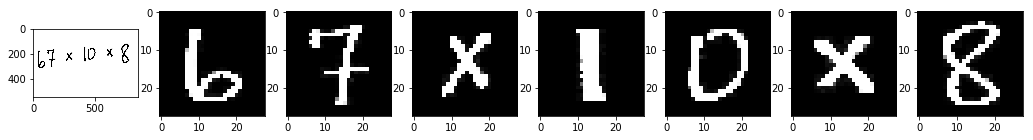

Equation =  6 7 x 1 0 x 8 


,RF,AB,MLP,CNN
ver1,0 2 x + 0 x x,2 3 + 8 0 8 6,6 7 x 1 0 x 8,6 7 8 1 0 x 8
ver2,0 + x + 0 x x,5 3 x 8 0 x 5,6 7 x 1 0 x 8,6 7 x 1 0 x 8


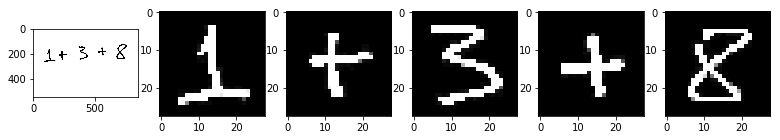

Equation =  1 + 3 + 8 


,RF,AB,MLP,CNN
ver1,+ + 3 + x,5 4 3 + 5,1 + 3 + 8,1 8 3 7 8
ver2,+ + + + x,5 + 3 + 5,1 + 3 + 8,1 + 3 4 8


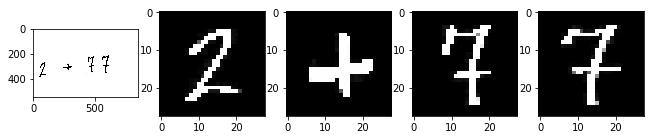

Equation =  2 + 7 7 


,RF,AB,MLP,CNN
ver1,8 + 2 +,8 4 2 3,2 + 7 7,2 4 7 7
ver2,x + 7 +,2 + 2 3,2 + 7 7,2 2 7 7


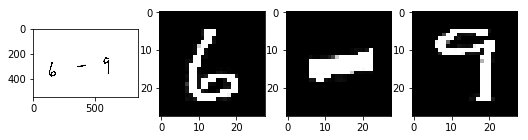

Equation =  6 - 9 


,RF,AB,MLP,CNN
ver1,0 - 0,5 x 3,6 + 7,6 2 9
ver2,0 - 7,5 - 7,6 - 7,6 2 9


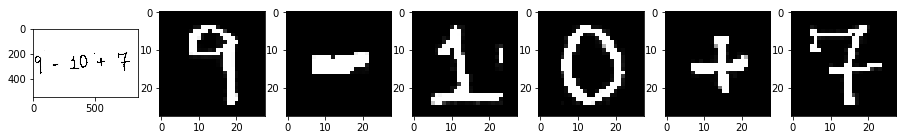

Equation =  9 - 1 0 + 7 


,RF,AB,MLP,CNN
ver1,x + x 0 + +,9 x 5 0 + 3,7 4 5 0 + 7,9 - 1 0 7 7
ver2,7 - + 0 + +,3 - 5 0 + 3,3 - 5 0 + 7,9 - 1 0 + 7


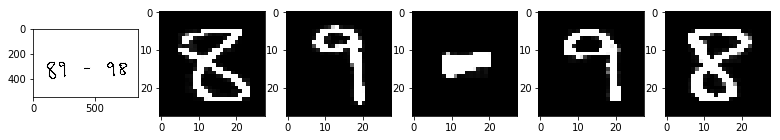

Equation =  8 9 - 9 8 


,RF,AB,MLP,CNN
ver1,x 7 + 0 x,8 3 x 9 8,8 3 4 9 8,8 9 5 9 8
ver2,x 7 - 0 x,5 3 - 9 8,8 3 - 9 8,8 9 - 9 8


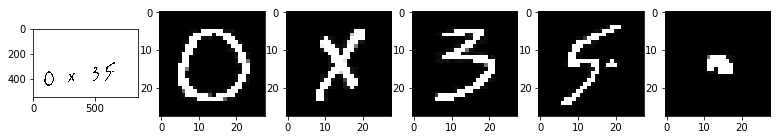

Equation =  0 x 3 5 


,RF,AB,MLP,CNN
ver1,0 x 3 + x,5 8 9 8 +,0 8 3 9 +,0 8 3 5 5
ver2,0 x 3 + x,5 1 9 5 x,0 x 3 5 x,0 x 3 5 -


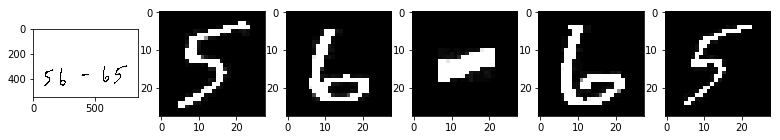

Equation =  5 6 - 6 5 


,RF,AB,MLP,CNN
ver1,3 0 + 0 +,5 5 4 5 5,5 6 4 6 5,5 6 5 6 5
ver2,x 0 - 0 x,5 5 + 5 5,5 5 - 6 5,5 2 2 6 5


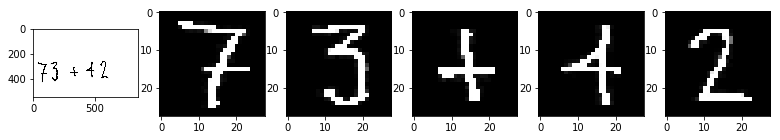

Equation =  7 3 + 4 2 


,RF,AB,MLP,CNN
ver1,7 0 + x 1,2 0 4 4 8,7 3 4 4 2,7 3 + 4 2
ver2,x 0 + + 1,3 0 2 4 8,2 3 1 4 2,3 3 2 4 2


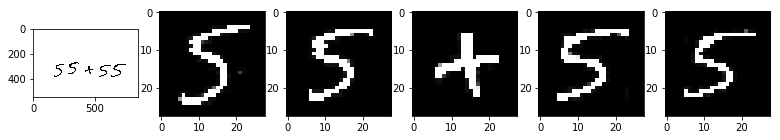

Equation =  5 5 + 5 5 


,RF,AB,MLP,CNN
ver1,3 x + 3 5,5 5 + 5 5,5 5 + 5 5,5 5 7 5 5
ver2,3 x + 3 5,1 5 + 5 5,5 5 + 5 5,5 5 4 5 5


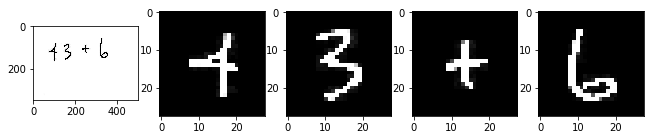

Equation =  4 3 + 6 


,RF,AB,MLP,CNN
ver1,x 3 + 0,9 5 4 5,4 3 + 6,4 3 7 6
ver2,+ + + 0,x 5 + 5,+ 3 x 6,4 3 7 6


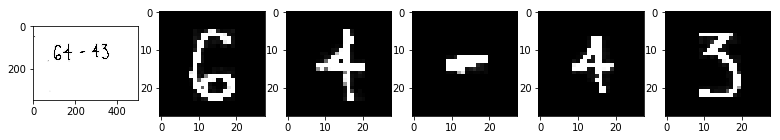

Equation =  6 4 - 4 3 


,RF,AB,MLP,CNN
ver1,0 + + + 3,0 9 x 4 3,6 4 + 4 3,5 4 7 7 3
ver2,0 + - + 7,8 4 - + 3,6 4 - 4 3,2 4 - 4 3


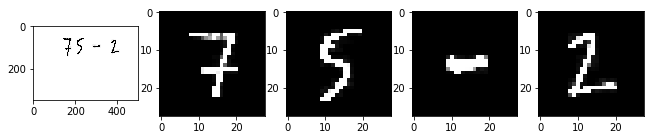

Equation =  7 5 - 2 


,RF,AB,MLP,CNN
ver1,7 5 + x,7 5 x 5,7 5 + 6,7 5 5 2
ver2,7 x - x,7 5 - 5,7 5 4 2,7 5 - 2


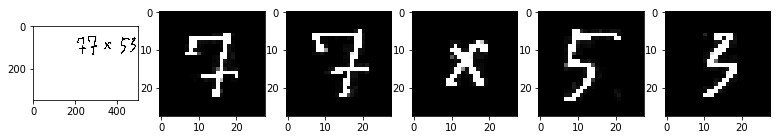

Equation =  7 7 x 5 3 


,RF,AB,MLP,CNN
ver1,7 7 x + +,7 7 4 5 5,7 7 x 5 3,7 7 x 5 3
ver2,7 7 x x +,7 7 x 2 x,7 7 x 5 3,7 7 x 5 3


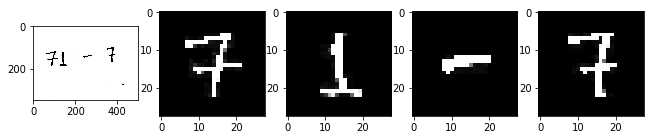

Equation =  7 1 - 7 


,RF,AB,MLP,CNN
ver1,+ + + 9,9 5 x 9,7 1 + 7,7 1 5 7
ver2,+ x - +,9 1 - +,7 1 - 7,7 1 - 7


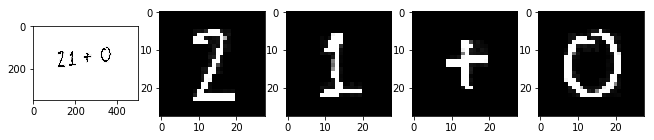

Equation =  2 1 + 0 


,RF,AB,MLP,CNN
ver1,1 + + 0,8 2 4 0,2 5 + 0,2 1 7 0
ver2,1 1 + 0,8 5 4 0,2 1 + 0,2 1 + 0


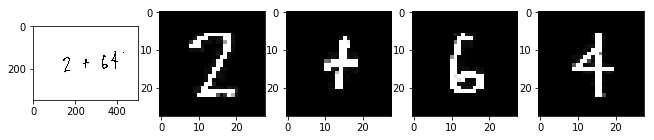

Equation =  2 + 6 4 


,RF,AB,MLP,CNN
ver1,7 + 6 +,9 4 2 4,2 + 6 4,7 7 6 4
ver2,7 + 6 +,2 x 6 +,2 x x 4,2 + 6 4


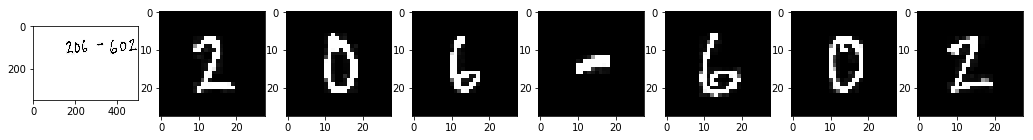

Equation =  2 0 6 - 6 0 2 


,RF,AB,MLP,CNN
ver1,1 6 6 x 6 7 x,5 2 5 + 2 9 5,1 0 6 + 6 0 x,2 0 6 7 6 0 2
ver2,x 7 1 - 6 7 x,1 4 6 x 6 9 5,2 0 6 x 6 0 2,2 0 6 - 6 0 2


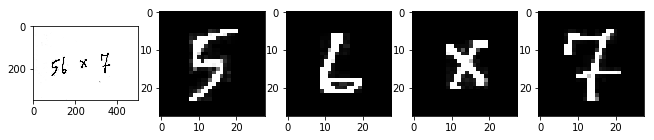

Equation =  5 6 x 7 


,RF,AB,MLP,CNN
ver1,8 6 x 1,8 5 4 3,5 6 x 7,5 0 x 7
ver2,x 6 x 1,8 5 4 7,5 6 x 7,5 2 x 7


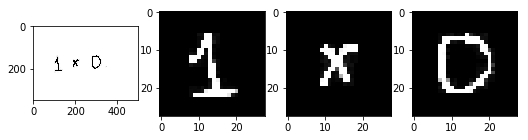

Equation =  1 x 0 


,RF,AB,MLP,CNN
ver1,+ x 0,5 + 2,1 x 0,1 x 0
ver2,x x 0,5 x 2,1 x 0,1 x 0


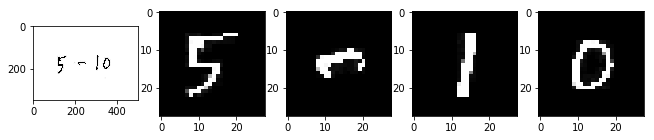

Equation =  5 - 1 0 


,RF,AB,MLP,CNN
ver1,+ x + 4,8 4 1 4,5 + 1 0,5 7 1 0
ver2,x - 1 6,5 - x 4,5 - 1 0,5 0 1 0


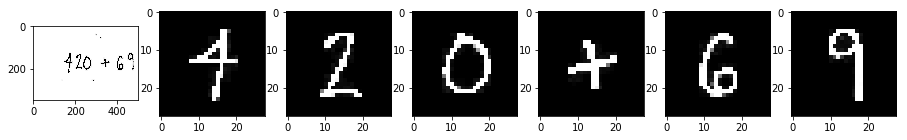

Equation =  4 2 0 + 6 9 


,RF,AB,MLP,CNN
ver1,+ 1 0 + 6 3,9 1 9 4 9 9,1 2 0 + 6 9,4 2 0 7 6 9
ver2,+ 1 0 + 6 7,9 2 2 + 2 9,4 2 0 x 6 9,4 2 0 7 6 9


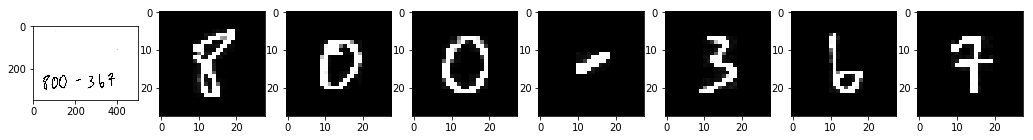

Equation =  8 0 0 - 3 6 7 


,RF,AB,MLP,CNN
ver1,8 7 0 x + 6 +,8 4 9 + 5 2 9,5 0 0 x 3 6 7,8 0 0 1 3 6 7
ver2,x 7 0 x x 7 +,8 4 9 x 5 2 4,8 0 0 9 3 6 7,8 0 0 1 3 6 7


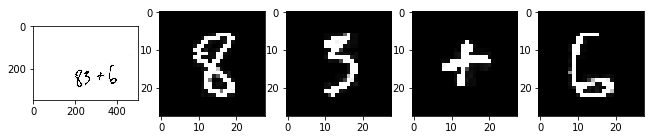

Equation =  8 3 + 6 


,RF,AB,MLP,CNN
ver1,x 7 + 0,9 9 4 5,8 9 + 6,8 3 7 6
ver2,x 7 + 0,9 9 + 5,x 3 + 6,8 3 - 2


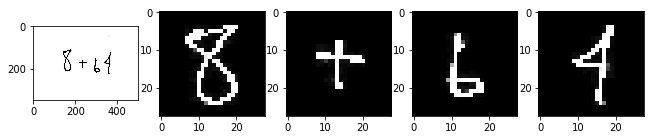

Equation =  8 + 6 4 


,RF,AB,MLP,CNN
ver1,x + 6 x,8 4 5 4,8 + 6 4,8 + 6 3
ver2,x + 6 +,8 4 5 4,8 x 6 4,8 + 2 4


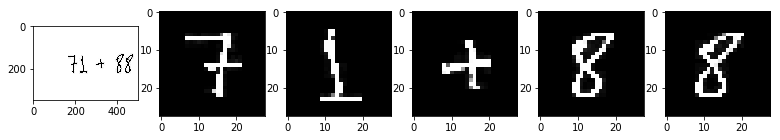

Equation =  8 + 6 4 


,RF,AB,MLP,CNN
ver1,+ x + x 8,9 5 4 5 5,3 5 + x x,7 1 7 8 8
ver2,+ x + x x,+ 5 4 8 8,7 5 4 x 8,7 1 + 8 8


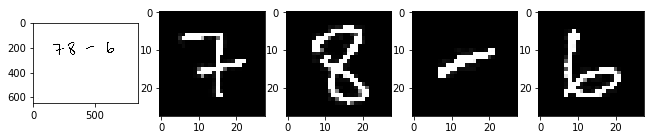

Equation =  7 8 - 6 


,RF,AB,MLP,CNN
ver1,+ x x 0,9 8 x 2,7 8 x 6,7 8 5 6
ver2,+ x - 0,7 8 4 2,7 8 - 6,7 8 5 6


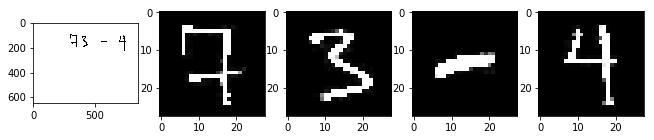

Equation =  7 3 - 4 


,RF,AB,MLP,CNN
ver1,2 3 + x,2 3 x 9,2 3 + 4,+ 3 - 4
ver2,2 3 - x,2 3 - 9,7 3 - 4,x 3 - 4


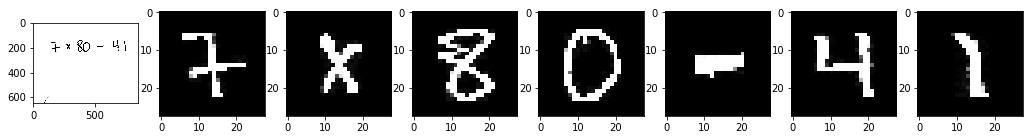

Equation =  7 x 8 0 - 4 1 


,RF,AB,MLP,CNN
ver1,+ x x 0 + - +,4 8 8 0 x 4 1,+ x 8 0 4 4 1,7 8 8 0 - 4 1
ver2,+ x x 0 - - +,+ 8 8 5 - + x,7 x 8 0 - 4 1,3 x 8 0 - 4 1


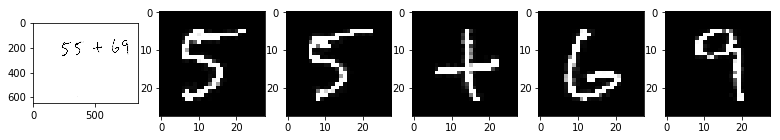

Equation =  5 5 + 6 9 


,RF,AB,MLP,CNN
ver1,5 5 + 0 7,5 5 4 5 9,5 5 + 6 7,5 5 + 6 9
ver2,5 5 + 0 7,5 5 4 5 9,5 5 1 6 9,5 5 + 6 9


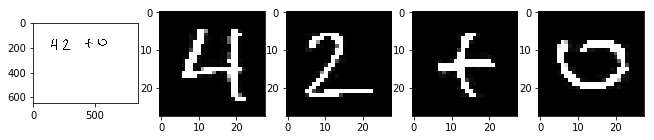

Equation =  4 2 + 0 


,RF,AB,MLP,CNN
ver1,4 x + 0,9 5 9 0,4 x + 0,4 2 + 0
ver2,4 0 + 0,4 5 + 0,4 2 + 0,4 2 + 0


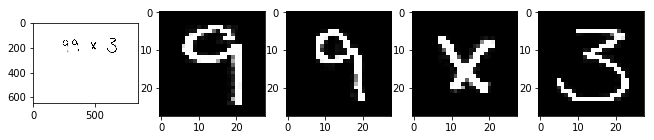

Equation =  9 9 x 3 


,RF,AB,MLP,CNN
ver1,x x x 3,3 9 4 3,9 9 x 3,9 9 x 3
ver2,3 3 x 3,3 9 x 3,9 9 x 3,9 9 x 3


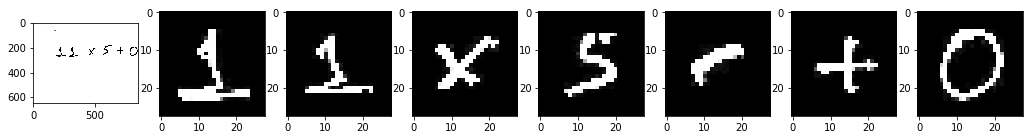

Equation =  1 1 x 5 + 0 


,RF,AB,MLP,CNN
ver1,3 x x 5 x + 0,8 5 5 3 4 + 0,1 x x 5 5 + 0,1 2 x 5 5 7 0
ver2,1 x x x x + 0,8 5 4 5 - + 0,1 x x 5 - + 0,1 2 x 5 7 + 0


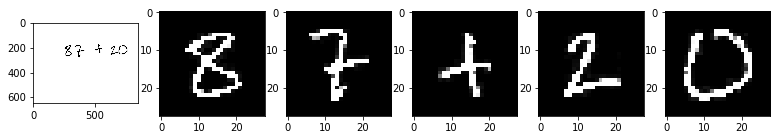

Equation =  8 7 + 2 0 


,RF,AB,MLP,CNN
ver1,x + + x 0,5 3 + 5 5,x 3 + x 0,8 3 1 2 0
ver2,x + + 0 0,x 3 + 5 5,x 3 x x 0,8 3 + 2 0


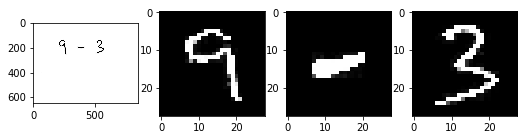

Equation =  9 - 3 


,RF,AB,MLP,CNN
ver1,3 + 3,3 4 3,9 4 3,9 - 3
ver2,3 - 3,9 - 3,9 - 3,9 2 3


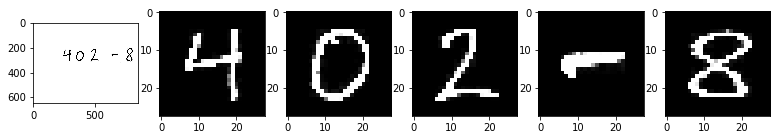

Equation =  4 0 2 - 8 


,RF,AB,MLP,CNN
ver1,- 0 x + x,9 0 2 x 3,4 0 2 + x,4 0 2 5 8
ver2,- 0 x - x,9 5 2 - 8,4 0 2 - x,4 0 2 - 8


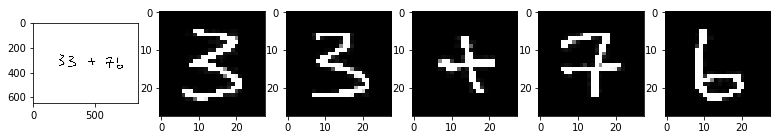

Equation =  3 3 + 7 6 


,RF,AB,MLP,CNN
ver1,3 5 + + 0,5 5 + 9 5,3 3 + 7 6,3 3 + 7 6
ver2,x 5 + + 0,3 5 + + 5,3 3 + 7 6,3 3 + 7 6


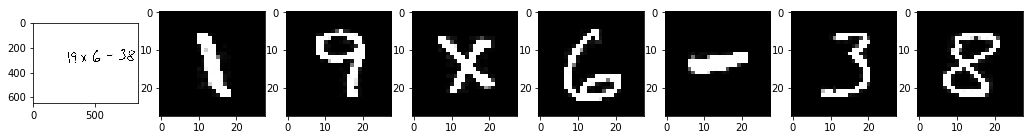

Equation =  1 9 x 6 - 3 8 


,RF,AB,MLP,CNN
ver1,+ x x 0 + 3 x,1 9 8 5 x 3 5,1 9 x 6 + 3 8,1 9 x 6 - 3 8
ver2,x 3 x 0 - 7 x,x 9 x 5 - 3 x,1 9 x 6 - + 8,1 9 x 2 - 3 8


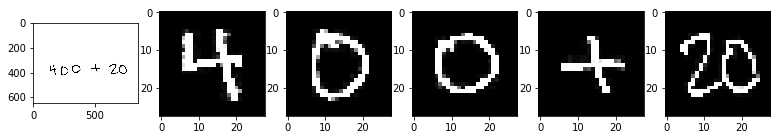

Equation =  4 0 0 + 2 0 


,RF,AB,MLP,CNN
ver1,+ 0 0 + 0,9 0 0 + 2,4 0 0 + 0,4 0 0 + x
ver2,+ 0 0 + 0,9 0 0 + 2,4 0 0 + 2,4 0 0 + x


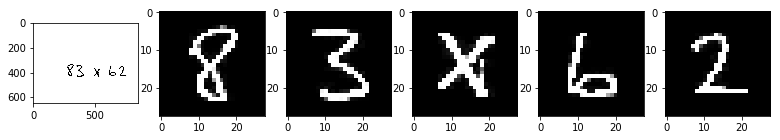

Equation =  8 3 x 6 2 


,RF,AB,MLP,CNN
ver1,x 3 x 6 1,8 3 8 5 1,8 3 x 6 2,8 3 8 6 2
ver2,x 3 x 6 x,8 3 8 5 1,8 3 x 5 2,8 3 x 2 2


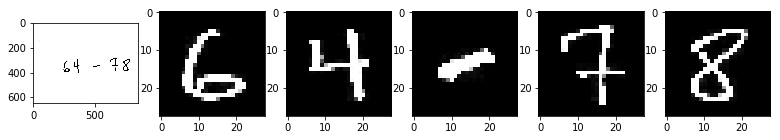

Equation =  6 4 - 7 8 


,RF,AB,MLP,CNN
ver1,0 - x 2 8,2 9 4 2 8,6 4 4 7 8,2 4 5 7 8
ver2,0 + - 2 x,5 9 + 2 8,6 4 - 7 8,2 4 2 7 8


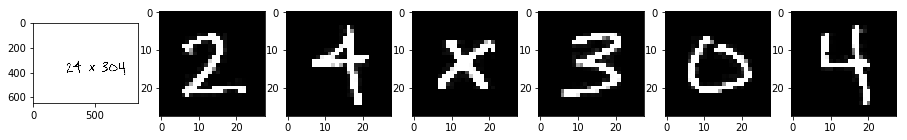

Equation =  2 4 x 3 0 4 


,RF,AB,MLP,CNN
ver1,x + x x 0 -,3 9 4 3 2 9,x 4 x 3 0 4,2 4 x 3 0 4
ver2,x + x x 0 -,2 9 4 x 2 4,2 4 x 3 0 4,2 4 x 3 0 4


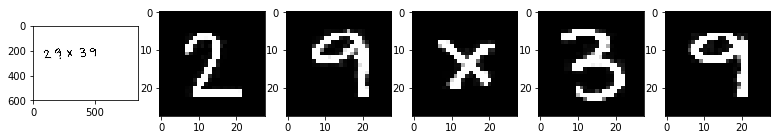

Equation =  2 9 x 3 9 


,RF,AB,MLP,CNN
ver1,x 0 x 3 x,8 9 4 3 9,x x x 3 x,2 9 x 3 9
ver2,x + x + +,x 9 x 3 +,2 9 x 3 +,2 9 x 3 9


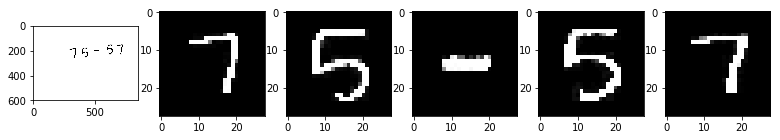

Equation =  7 5 - 5 7 


,RF,AB,MLP,CNN
ver1,7 - - 3 7,- 3 - 5 7,7 5 4 5 7,7 5 - 5 7
ver2,7 - - 3 7,9 3 x 5 9,7 5 4 5 7,7 5 - 5 7


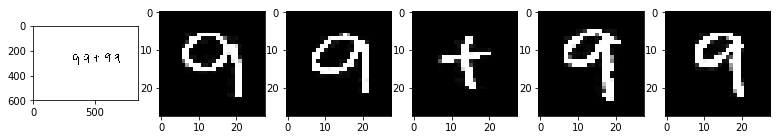

Equation =  9 9 + 9 9 


,RF,AB,MLP,CNN
ver1,- 9 + 3 x,9 9 1 3 9,x x + 9 x,9 9 5 9 9
ver2,+ + + + x,+ 9 4 3 9,9 9 + 9 +,9 9 5 9 9


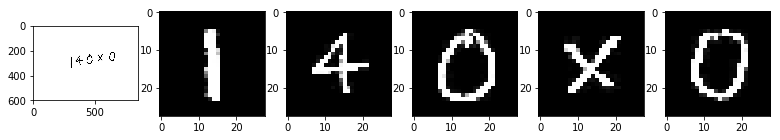

Equation =  1 4 0 x 0 


,RF,AB,MLP,CNN
ver1,+ + 0 x 0,1 4 0 8 0,1 + 0 x 0,1 4 0 x 0
ver2,1 + 0 x 0,1 + 0 x 0,1 4 0 x 0,1 4 0 x 0


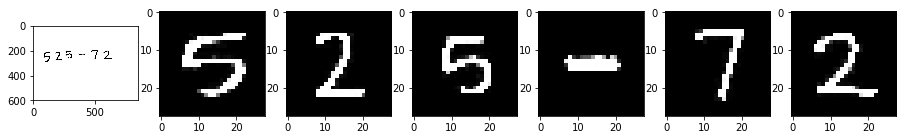

Equation =  5 2 5 - 7 2 


,RF,AB,MLP,CNN
ver1,+ 1 + - 3 2,9 2 9 + 3 2,5 2 5 + 7 2,5 2 5 - 7 2
ver2,+ x + - 7 x,9 2 9 - 3 2,5 2 5 4 7 2,5 2 5 - 7 2


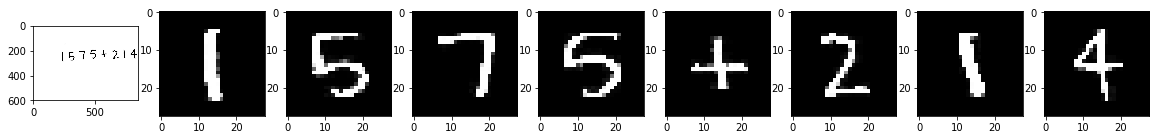

Equation =  1 5 7 5 + 2 1 4 9 


,RF,AB,MLP,CNN
ver1,+ - 7 + + 1 + +,1 5 - 9 4 2 + 4,1 5 7 5 + 2 1 4,1 5 7 5 7 2 1 4
ver2,1 + 7 + + x + +,1 + + + + 2 + 4,1 5 + 5 x 2 1 4,1 5 7 5 + 2 1 4


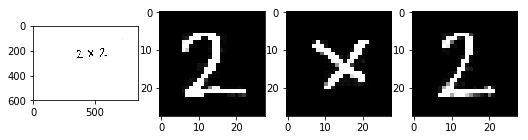

Equation =  2 x 2 


,RF,AB,MLP,CNN
ver1,x x x,2 4 2,x x 2,2 x 2
ver2,x x x,x 4 x,2 x 2,2 x 2


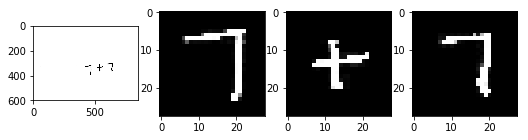

Equation =  7 + 7 


,RF,AB,MLP,CNN
ver1,0 + 7,3 4 -,0 + 7,7 7 7
ver2,0 + 7,5 4 9,1 + 7,7 + 7


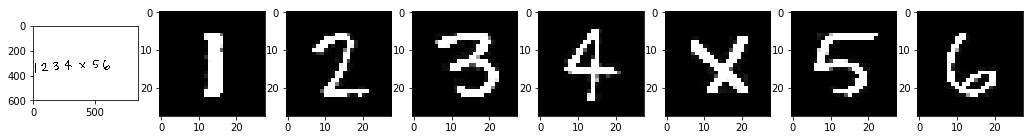

Equation =  1 2 3 4 x 5 6 


,RF,AB,MLP,CNN
ver1,+ 1 + + x - 6,+ 2 3 4 4 5 2,1 2 3 4 x 5 6,1 2 3 4 x 5 6
ver2,+ 1 + + x + 0,+ 2 + 4 x + 2,+ 2 3 4 x 5 6,1 2 3 4 4 5 6


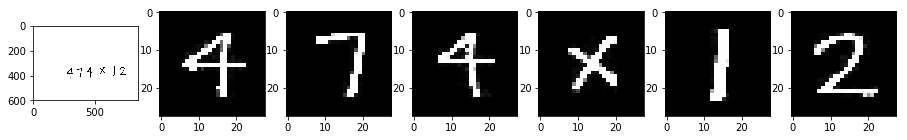

Equation =  4 7 4 x 1 2 


,RF,AB,MLP,CNN
ver1,- 7 9 x 1 2,9 7 9 8 1 2,4 7 9 x 1 2,4 7 4 x 1 2
ver2,+ 7 + x 1 x,+ 9 9 8 1 2,4 + 9 x 1 2,4 7 4 x 1 2


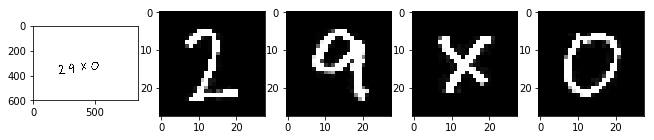

Equation =  2 9 x 0 


,RF,AB,MLP,CNN
ver1,+ x x 0,2 9 8 0,2 9 x 0,2 9 x 0
ver2,1 + x 0,8 9 x 0,2 9 x 0,2 9 x 0


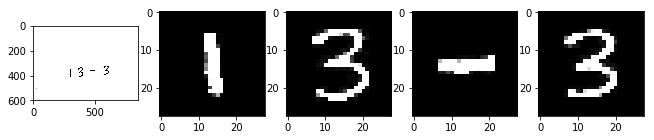

Equation =  1 3 - 3 


,RF,AB,MLP,CNN
ver1,+ 3 - 3,+ 3 + 3,1 3 + 3,1 3 - 3
ver2,+ 3 - x,+ 3 - 3,1 3 - 3,1 3 - 3


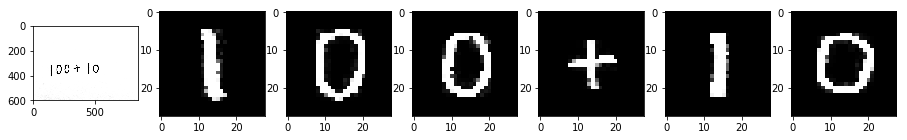

Equation =  1 0 0 + 1 0 


,RF,AB,MLP,CNN
ver1,+ 0 0 + + 0,1 0 0 4 + 0,1 0 0 + 1 0,1 0 0 7 1 0
ver2,+ 0 0 + + 0,1 0 0 x x 0,1 0 0 + + 0,1 0 0 + 1 0


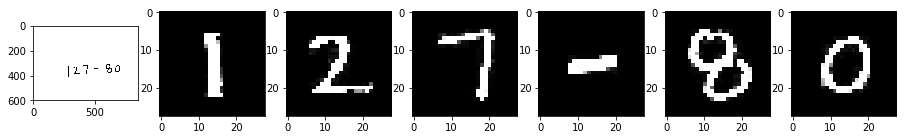

Equation =  1 2 7 - 8 0 


,RF,AB,MLP,CNN
ver1,+ x 7 - + 0,+ 8 3 + 8 0,1 x 7 + 5 0,1 2 7 - 8 0
ver2,+ x 7 - + 0,+ x 9 - 8 0,+ 2 7 4 8 0,1 2 7 - 8 0


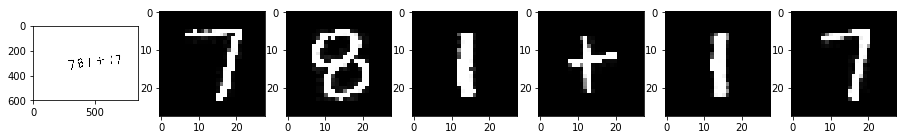

Equation =  7 8 1 + 1 7 


,RF,AB,MLP,CNN
ver1,7 + + + + 7,3 8 1 4 + 9,7 9 1 + 1 7,7 8 1 + 1 7
ver2,7 + + + + 7,9 8 + + + 9,7 8 + + 1 7,1 8 1 + 1 7


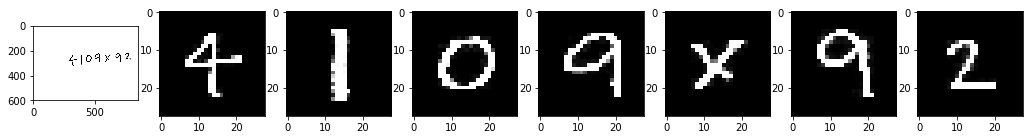

Equation =  4 1 0 9 x 9 2 


,RF,AB,MLP,CNN
ver1,+ 1 0 9 x x x,9 1 0 9 4 9 5,+ 1 0 x x 9 2,4 1 0 9 x 9 2
ver2,+ 1 0 + x + x,+ 1 0 9 8 9 5,+ 1 0 + x 9 2,4 1 0 9 x 9 2


CPU times: user 7min 49s, sys: 11.3 s, total: 8min
Wall time: 7min 25s


In [31]:
%%time
# Evaluating each equation image
page_counter =0;
for eqns in eqn_full:
    equation_counter=0;
    for c in range(len(eqns)):
        # initialising strings to store output of model predictions
        rf_pred_ver1 = '';ada_pred_ver1 = '';mlp_pred_ver1 = '';cnn_pred_ver1 = '';
        rf_pred_ver2 = '';ada_pred_ver2 = '';mlp_pred_ver2 = '';cnn_pred_ver2 = '';
        eqn1 = eqns[c]
        # extract segments (digits/symbols) from each equation image
        segments= preprocess.extract_segments(eqn1, 30, reshape = 1, size = [28,28], 
                                              area=100, gray = True, dil = True,  ker = 1)

        # run prediction on each segment
        plt.figure(figsize=(20,20))
        for i in range(len(segments)+1):
            if i ==0:
                plt.subplot(191)
                plt.imshow(eqn1,cmap = 'gray')
                pass
            else :
                # plot each segment
                plt.subplot(191+i)
                temp = segments[i-1]
                plt.imshow(temp,cmap = 'gray')
                temp = temp.reshape(1,-1)
                
                pred = preprocess.predict(temp, label_class, 0, adastage1_ver1, adadigits_ver1, adachars_ver1,
                                             rfmodel_ver1, MLP_single_ver1, cnn_ver1 )
                
                ada_pred_ver1 += pred[0];  rf_pred_ver1 += pred[1]; mlp_pred_ver1 += pred[2];
                cnn_pred_ver1 += pred[3] 

                pred = preprocess.predict(temp, label_class, 0, adastage1_ver2, adadigits_ver2, adachars_ver2,
                                             rfmodel_ver2, MLP_single_ver2, cnn_ver2 )
                
                ada_pred_ver2 += pred[0];  rf_pred_ver2 += pred[1]; mlp_pred_ver2 += pred[2];
                cnn_pred_ver2 += pred[3] 

        results_1 = pd.DataFrame([ [rf_pred_ver1,ada_pred_ver1,mlp_pred_ver1,cnn_pred_ver1], 
                        [rf_pred_ver2, ada_pred_ver2,mlp_pred_ver2,cnn_pred_ver2] ], index = ['ver1', 'ver2'],  
                                 columns = ['RF','AB','MLP','CNN'])  
                                                                                    
        plt.show();           
        print('Equation = ', eqn_labels[page_counter][equation_counter])
        display(HTML(results_1.to_html()))

        performance_RF = dictionary_update(performance_RF,eqn_labels[page_counter][equation_counter]
                                           ,rf_pred_ver1,rf_pred_ver2);
        performance_AB = dictionary_update(performance_AB,eqn_labels[page_counter][equation_counter]
                                           ,ada_pred_ver1,ada_pred_ver2);
        performance_MLP = dictionary_update(performance_MLP,eqn_labels[page_counter][equation_counter]
                                            ,mlp_pred_ver1,mlp_pred_ver2);
        performance_CNN = dictionary_update(performance_CNN,eqn_labels[page_counter][equation_counter]
                                            ,cnn_pred_ver1,cnn_pred_ver2);
    
        equation_counter = equation_counter + 1;

    page_counter = page_counter + 1;


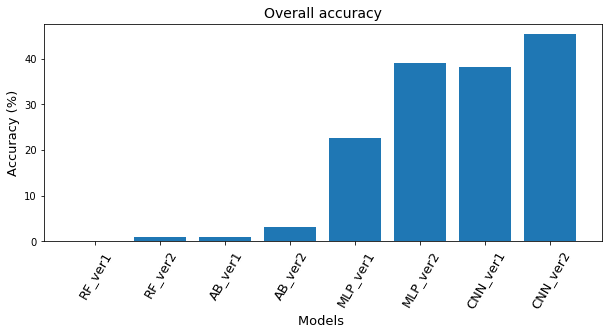

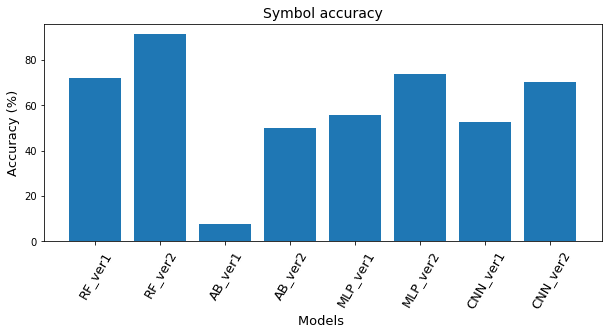

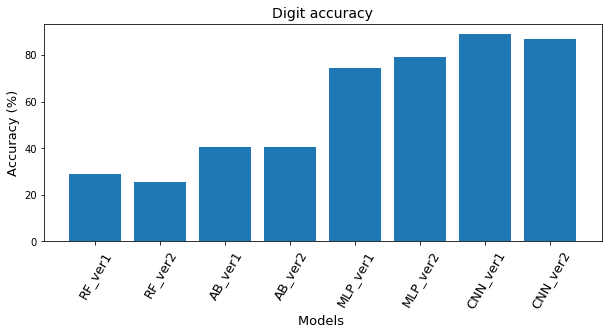

,RF_ver1,RF_ver2,AB_ver1,AB_ver2,MLP_ver1,MLP_ver2,CNN_ver1,CNN_ver2
overall,0.000000,1.030928,1.030928,3.092784,22.680412,39.175258,38.144330,45.360825
digits,29.069767,25.581395,40.697674,40.406977,74.709302,79.069767,88.953488,86.918605
symbols,72.115385,91.346154,7.692308,50.000000,55.769231,74.038462,52.884615,70.192308


In [32]:
temp1 = " ".join(equationpg1);
temp2 = " ".join(equationpg2);
temp3 = " ".join(equationpg3);
temp4 = " ".join(equationpg4);
temp6 = " ".join(equationpg6);
temp8 = " ".join(equationpg8);

characters = temp1.split()+temp2.split()+temp3.split()+temp4.split()+temp6.split()+temp8.split() ;
num_count =0
sym_count =0;
for i in characters:
    if (str.isnumeric(i)):
        num_count = num_count + 1;
    else:
        sym_count = sym_count + 1;

Performance = [performance_RF,performance_AB,performance_MLP,performance_CNN];
overall_accuracy = [];
digit_accuracy = [];
symbol_accuracy_accuracy = [];

for i in Performance:
    for key,val in i.items():
        if key == "ver1":
            overall_accuracy.append(100*val/num_equations);
        if key == "ver2":
            overall_accuracy.append(100*val/num_equations);
        if key == "ver1_digits":
            digit_accuracy.append(100*val/num_count);
        if key == "ver2_digits":
            digit_accuracy.append(100*val/num_count);
        if key == "ver1_symbols":
            symbol_accuracy_accuracy.append(100*val/(sym_count)); 
        if key == "ver2_symbols":
            symbol_accuracy_accuracy.append(100*val/(sym_count)); 

plt.figure( figsize=(10,4))
plt.bar(range(8),overall_accuracy)
plt.xticks(range(8),['RF_ver1','RF_ver2','AB_ver1','AB_ver2','MLP_ver1','MLP_ver2','CNN_ver1',
                     'CNN_ver2'], fontsize = 13, rotation = 60)
plt.title('Overall accuracy', fontsize = 14)
plt.xlabel('Models ',fontsize = 13)
plt.ylabel('Accuracy (%)', fontsize = 13)
plt.show()

plt.figure( figsize=(10,4))
plt.bar(range(8),symbol_accuracy_accuracy)
plt.xticks(range(8),['RF_ver1','RF_ver2','AB_ver1','AB_ver2','MLP_ver1','MLP_ver2','CNN_ver1'
                     ,'CNN_ver2'], fontsize = 13, rotation = 60)
plt.title('Symbol accuracy', fontsize = 14)
plt.xlabel('Models ',fontsize = 13)
plt.ylabel('Accuracy (%)', fontsize = 13)
plt.show()

plt.figure( figsize=(10,4))
plt.bar(range(8),digit_accuracy)
plt.xticks(range(8),['RF_ver1','RF_ver2','AB_ver1','AB_ver2','MLP_ver1','MLP_ver2'
                     ,'CNN_ver1','CNN_ver2'], fontsize = 13, rotation = 60)
plt.title('Digit accuracy', fontsize = 14)
plt.xlabel('Models ',fontsize = 13)
plt.ylabel('Accuracy (%)', fontsize = 13)
plt.show()

results = pd.DataFrame( [overall_accuracy,digit_accuracy,symbol_accuracy_accuracy], columns = ['RF_ver1','RF_ver2',
                      'AB_ver1','AB_ver2','MLP_ver1','MLP_ver2','CNN_ver1','CNN_ver2'], index = 
                      ['overall','digits','symbols'])
                     
results

## only 3 equation images